In [109]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [110]:
IMAGE_SIZE = 256
CHANNELS = 3

In [111]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = 'C:\\Users\\alexc\\OneDrive - Universiti Teknologi PETRONAS\\Uni Stuff\\Final Year Sem3\\FYP2\\dataset\\train\\' 

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 144 images belonging to 2 classes.


In [112]:
train_generator.class_indices

{'Healthy': 0, 'Infected': 1}

In [113]:
class_names = list(train_generator.class_indices.keys())
class_names

['Healthy', 'Infected']

In [114]:
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 ...

 [[0.98963    0.99355155 1.        ]
  [0.9895582  0.9934798  1.        ]
  [0.9894864  0.99340796 1.        ]
  ...
  [0.95152175 0.97647065 0.96152997]
  [0.95168954 0.9791405  0.95168954]
  [0.9582797  0.98306143 0.9689566 ]]

 [[0.98823535 0.9921569  1.        ]
  [0.98823535 0.9921569  1.        ]


In [115]:
val_dir = 'C:\\Users\\alexc\\OneDrive - Universiti Teknologi PETRONAS\\Uni Stuff\\Final Year Sem3\\FYP2\\dataset\\val\\' 

validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

validation_generator = validation_datagen.flow_from_directory(
        val_dir,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 20 images belonging to 2 classes.


In [116]:
test_dir = 'C:\\Users\\alexc\\OneDrive - Universiti Teknologi PETRONAS\\Uni Stuff\\Final Year Sem3\\FYP2\\dataset\\test\\' 

test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 42 images belonging to 2 classes.


In [126]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(16, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [127]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 30, 30, 16)      

In [128]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [129]:
144/32

4.5

In [130]:
20/32

0.625

In [131]:
history = model.fit(
    train_generator,
    steps_per_epoch=4,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=1,
    verbose=1,
    epochs=20,
)

Epoch 1/20
4/4 [==============================] - 5s 1s/step - loss: 1.0262 - accuracy: 0.5391 - val_loss: 0.8718 - val_accuracy: 0.5000
Epoch 2/20
4/4 [==============================] - 4s 1s/step - loss: 0.7188 - accuracy: 0.5156 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 3/20
4/4 [==============================] - 4s 879ms/step - loss: 0.6890 - accuracy: 0.5804 - val_loss: 0.6889 - val_accuracy: 0.5000
Epoch 4/20
4/4 [==============================] - 4s 991ms/step - loss: 0.6894 - accuracy: 0.4732 - val_loss: 0.6866 - val_accuracy: 0.5000
Epoch 5/20
4/4 [==============================] - 4s 1s/step - loss: 0.6813 - accuracy: 0.4821 - val_loss: 0.6672 - val_accuracy: 0.5000
Epoch 6/20
4/4 [==============================] - 4s 1s/step - loss: 0.6699 - accuracy: 0.4732 - val_loss: 0.6572 - val_accuracy: 0.5000
Epoch 7/20
4/4 [==============================] - 4s 1s/step - loss: 0.6345 - accuracy: 0.5000 - val_loss: 0.6356 - val_accuracy: 0.5500
Epoch 8/20
4/4 [===================

In [132]:
scores = model.evaluate(test_generator)

2/2 [==============================] - 1s 178ms/step - loss: 0.4465 - accuracy: 0.7619


In [133]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

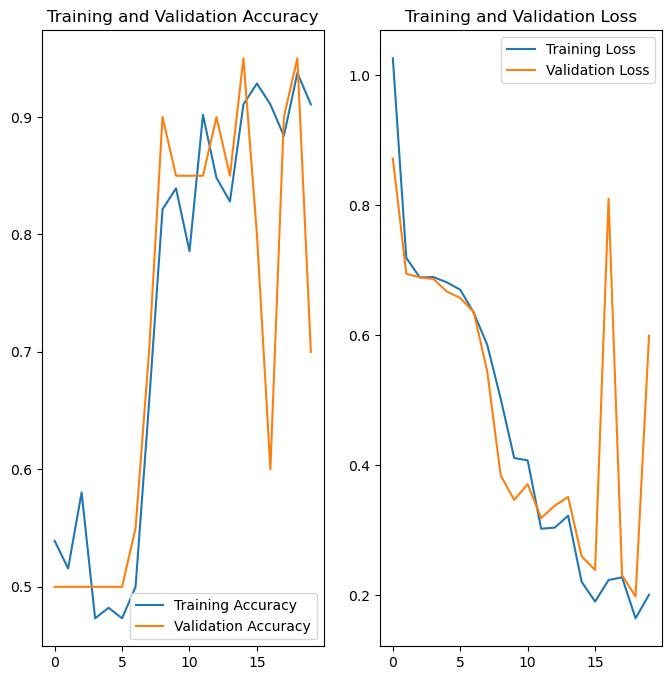

In [134]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Infected
1/1 [==============================] - 0s 269ms/step
predicted label: Infected


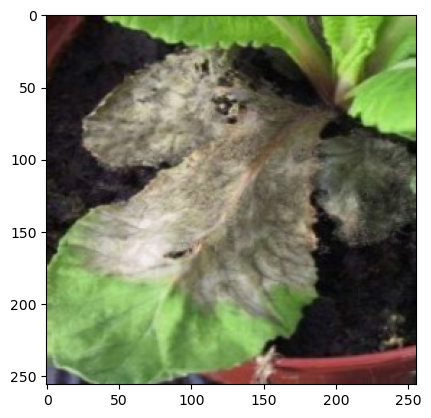

In [135]:
import numpy as np

for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[1])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [136]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 34ms/step


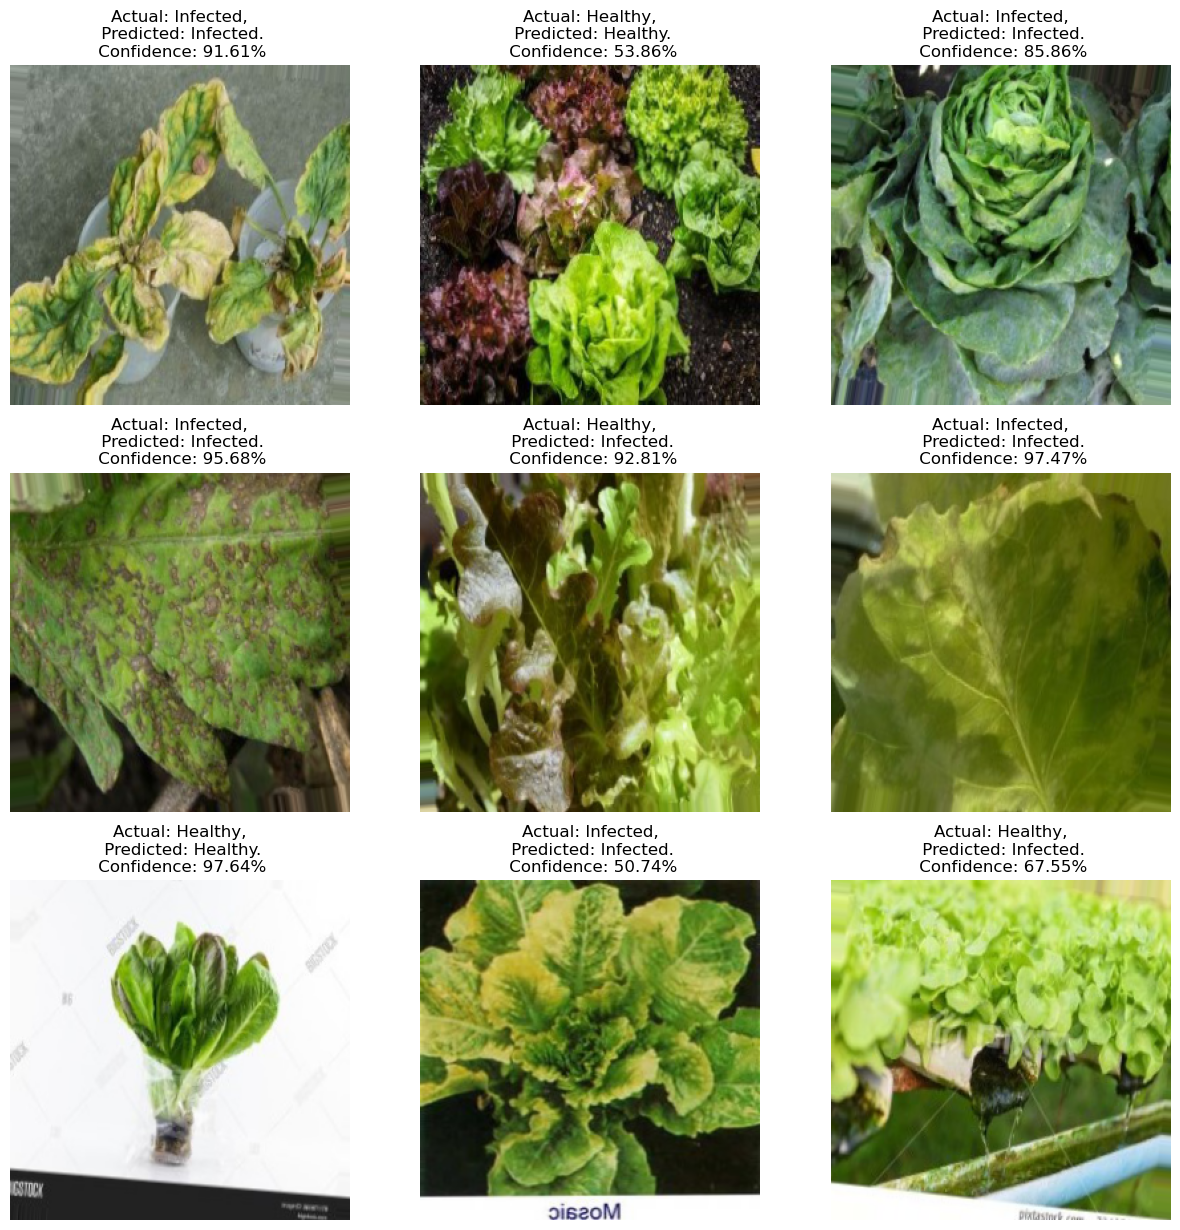

In [137]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [138]:
model.save("../testing.h5")